# Community Detection

## networkx和community结合

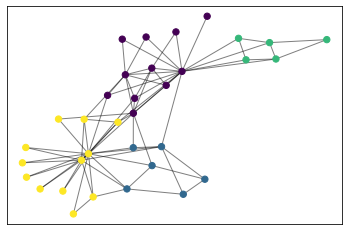

In [16]:
>>> import community as community_louvain
>>> import matplotlib.cm as cm
>>> import matplotlib.pyplot as plt
>>> import networkx as nx
>>> G = nx.karate_club_graph()
>>> # compute the best partition
>>> partition = community_louvain.best_partition(G)

>>> # draw the graph
>>> pos = nx.spring_layout(G)
>>> # color the nodes according to their partition
>>> cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
>>> nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
>>>                        cmap=cmap, node_color=list(partition.values()))
>>> nx.draw_networkx_edges(G, pos, alpha=0.5)
>>> plt.show()

## igraph

In [55]:
import igraph as ig
import scipy.io as sio
import numpy as np
import leidenalg as la
import random
print(ig.__version__)

0.8.3


In [56]:
N = 200
g = ig.Graph.Famous('Zachary')
clusters = la.find_partition(g, la.ModularityVertexPartition)
# plot(clusters)
print("type of ig.Graph")
type(g)
type(clusters)
print(clusters)
print("type of clusters")
type(clusters)

type of ig.Graph
Clustering with 34 elements and 4 clusters
[0] 8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33
[1] 0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21
[2] 23, 24, 25, 27, 28, 31
[3] 4, 5, 6, 10, 16
type of clusters


leidenalg.VertexPartition.ModularityVertexPartition

In [57]:
member = clusters.membership
print(member) #得到每个节点属于的社区编号
new_cmap = ['#'+''.join([random.choice('0123456789abcdef') for x in range(6)]) for z in range(len(clusters))]
new_cmap # 随机生成社区颜色

[1, 1, 1, 1, 3, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0]


['#769cee', '#e03c6e', '#22bc3f', '#63500d']

In [58]:
# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，
# 一般用在 for 循环当中。
for i, c in enumerate(clusters):
    print(f"({i},{c})")

(0,[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33])
(1,[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21])
(2,[23, 24, 25, 27, 28, 31])
(3,[4, 5, 6, 10, 16])


In [59]:
vcolors = {v: new_cmap[i] for i, c in enumerate(clusters) for v in c} #key为节点标签，value为节点颜色
print(vcolors) # 让每个社区的节点颜色相同

{8: '#769cee', 9: '#769cee', 14: '#769cee', 15: '#769cee', 18: '#769cee', 20: '#769cee', 22: '#769cee', 26: '#769cee', 29: '#769cee', 30: '#769cee', 32: '#769cee', 33: '#769cee', 0: '#e03c6e', 1: '#e03c6e', 2: '#e03c6e', 3: '#e03c6e', 7: '#e03c6e', 11: '#e03c6e', 12: '#e03c6e', 13: '#e03c6e', 17: '#e03c6e', 19: '#e03c6e', 21: '#e03c6e', 23: '#22bc3f', 24: '#22bc3f', 25: '#22bc3f', 27: '#22bc3f', 28: '#22bc3f', 31: '#22bc3f', 4: '#63500d', 5: '#63500d', 6: '#63500d', 10: '#63500d', 16: '#63500d'}


In [60]:
opinion = np.random.random((34,))
vcolors = {v: [opinion[v], 1 - opinion[v], abs(0.5 -opinion[v])] for i, c in enumerate(clusters) for v in c} #key为节点标签，value为节点颜色
print(vcolors) # 让每个社区的节点颜色相同

{8: [0.4057698668617682, 0.5942301331382318, 0.09423013313823181], 9: [0.03546300121095647, 0.9645369987890435, 0.46453699878904353], 14: [0.39107502793605264, 0.6089249720639474, 0.10892497206394736], 15: [0.1846976113620864, 0.8153023886379136, 0.3153023886379136], 18: [0.9861217178845205, 0.013878282115479479, 0.4861217178845205], 20: [0.4095964566680673, 0.5904035433319327, 0.09040354333193268], 22: [0.11215312070802974, 0.8878468792919703, 0.38784687929197026], 26: [0.8706079113273103, 0.1293920886726897, 0.3706079113273103], 29: [0.4376930327604275, 0.5623069672395725, 0.06230696723957252], 30: [0.22002608162374093, 0.7799739183762591, 0.27997391837625907], 32: [0.06514534202435696, 0.934854657975643, 0.43485465797564304], 33: [0.42446311523772595, 0.575536884762274, 0.07553688476227405], 0: [0.011382485380045604, 0.9886175146199544, 0.4886175146199544], 1: [0.5248741462836287, 0.4751258537163713, 0.024874146283628717], 2: [0.24828498845199365, 0.7517150115480064, 0.2517150115480

In [61]:
?g.vs.indices

Type:        list
String form: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Length:      34
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [62]:
type(g.vs.indices)

list

In [63]:
g.vs["color"] = [vcolors[v] for v in g.vs.indices] # 遍历每个节点，得到他们的颜色值

In [64]:
g.es[1].tuple # 得到边集中的(source, target)
type(member) 
member[1] # 得到第一个节点的社区编号
g.es[1].index # 得到边集的序列号
# print(g.es.indices) # g.es.indices得到图的边序列号

1

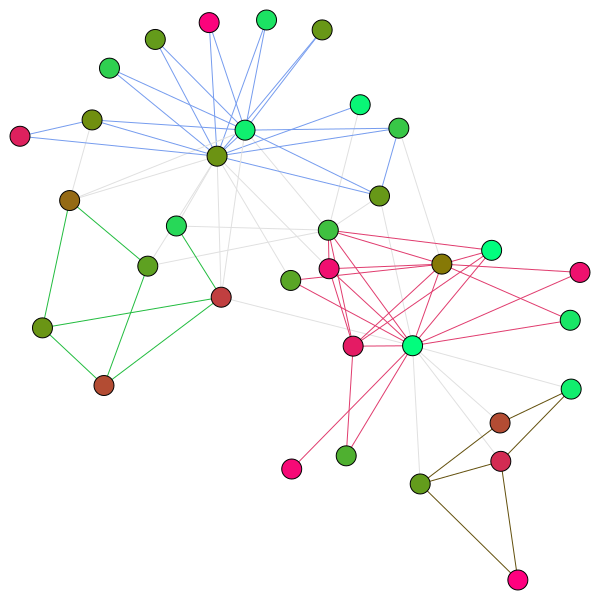

In [65]:
ecolors = {e.index: new_cmap[member[e.tuple[0]]] if member[e.tuple[0]]==member[e.tuple[1]] else "#e0e0e0" for e in g.es}
eweights = {e.index: (3*g.vcount()) if member[e.tuple[0]]==member[e.tuple[1]] else 0.1 for e in g.es}
g.es["weight"] = [eweights[e.index] for e in g.es] # 将边集的权重赋值
g.es["color"] = [ecolors[e] for e in g.es.indices] # 将边集的颜色赋值
# visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"], maxiter=500, area=N ** 3, repulserad=N ** 3)
ig.plot(g, make_groups = True)

In [54]:
g3 = ig.Graph.Famous('Zachary')
clusters3 = la.find_partition(g3,la.ModularityVertexPartition)

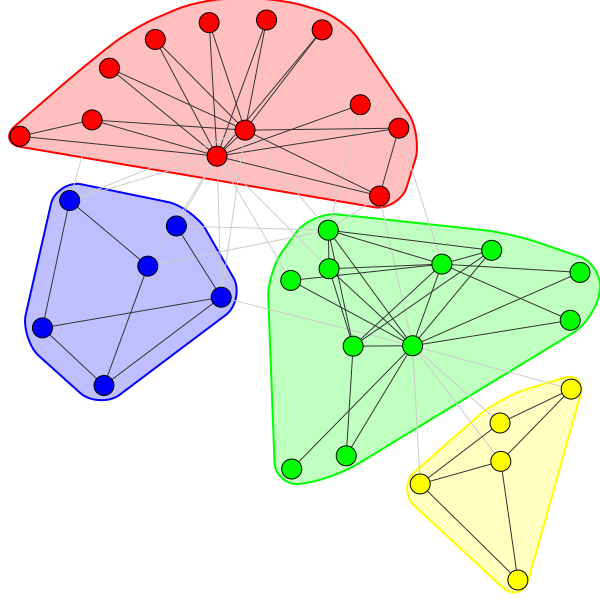

In [144]:
ig.plot(clusters3, mark_groups = True)

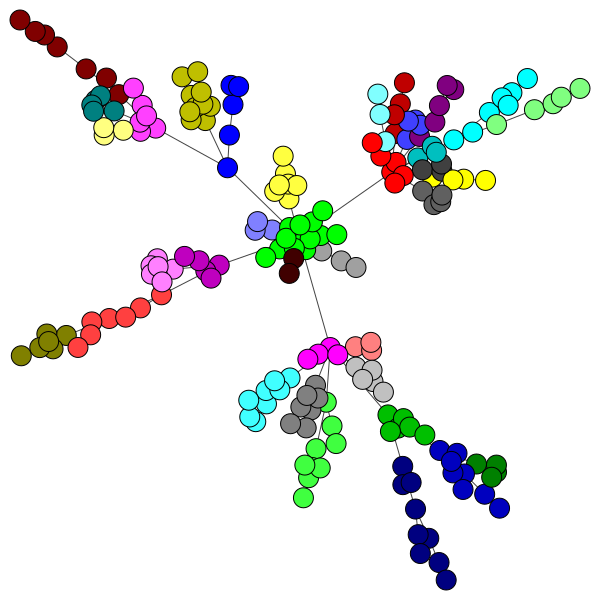

In [43]:
import igraph
g = igraph.Graph.Barabasi(n = 200, m = 1)
i = g.community_infomap()
pal = igraph.drawing.colors.ClusterColoringPalette(len(i))
g.vs['color'] = pal.get_many(i.membership)
igraph.plot(g)